### Additional figures/analyses for revisions

In [1]:
# remotes::install_github("mahendra-mariadassou/phyloseq-extended", ref = "dev")
library(phyloseq.extended)
library(phyloseq)
library(ggplot2)

Warning message:
“replacing previous import ‘ape::where’ by ‘dplyr::where’ when loading ‘phyloseq.extended’”

Attaching package: ‘phyloseq’


The following object is masked from ‘package:phyloseq.extended’:

    UniFrac




In [2]:
# load data from diversity analyses
load("../02-diversity_analyses/.RData")

In [3]:
ps.dat
head(sample_data(ps.dat))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2918 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 2918 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2918 tips and 2917 internal nodes ]

,study_id,aliquot_type,sex,age_y,study_group,FDI_code,oral_health,tooth_health,tooth_type,tooth_age
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
DM00001V1PQ,DM00001,CAE-PE,M,9,HI,NA,CAE,PE,NA,NA
DM00005V1PQ46-2,DM00005,CF-PF,M,6,HUU,46,CF,PF,molar,adult
DM00006V1PQ1,DM00006,CF-PF,M,7,HI,NA,CF,PF,NA,NA
DM00007V1PQ1,DM00007,CF-PF,M,6,HEU,NA,CF,PF,NA,NA
DM00008V1PQ16-2,DM00008,CF-PF,F,9,HI,16,CF,PF,molar,adult
DM00008V1PQ26-1,DM00008,CF-PF,F,9,HI,26,CF,PF,molar,adult


#### Rarefaction curve

rarefying sample DM00001V1PQ
rarefying sample DM00005V1PQ46-2
rarefying sample DM00006V1PQ1
rarefying sample DM00007V1PQ1
rarefying sample DM00008V1PQ16-2
rarefying sample DM00008V1PQ26-1
rarefying sample DM00009V1PQ65
rarefying sample DM00010V1PQ54
rarefying sample DM00011V1PQ55-1
rarefying sample DM00012V1PQ1
rarefying sample DM00013V1PQ65-3
rarefying sample DM00013V1PQ83-2
rarefying sample DM00014V1PQ3
rarefying sample DM00014V1PQ64-2
rarefying sample DM00014V1PQ84-1
rarefying sample DM00015V1PQ
rarefying sample DM00016V1PQ16
rarefying sample DM00016V1PQ26
rarefying sample DM00017V1PQ16
rarefying sample DM00017V1PQ31
rarefying sample DM00018V1PQ46-1
rarefying sample DM00018V1PQ74-1
rarefying sample DM00018V1PQ75-1
rarefying sample DM00019V1PQ16
rarefying sample DM00019V1PQ36-1
rarefying sample DM00020V1PQ16-1
rarefying sample DM00020V1PQ26-1
rarefying sample DM00021V1PQ11-12-1
rarefying sample DM00021V1PQ31-41-1
rarefying sample DM00021V1PQ55-1
rarefying sample DM00021V1PQ65-1
raref

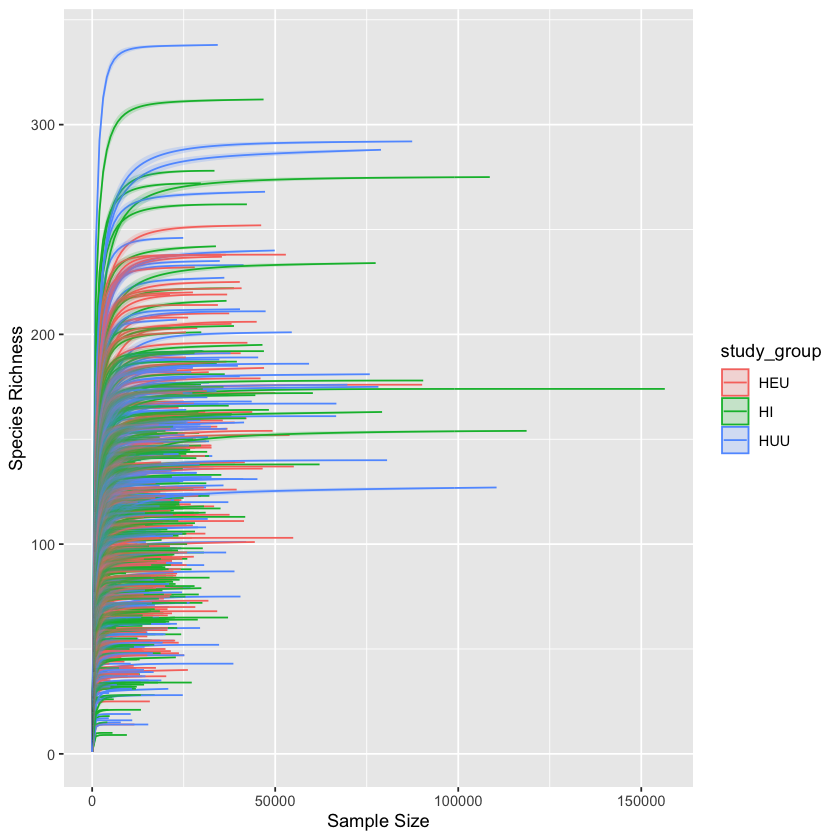

In [4]:
options(warn=-1) # suppress warnings
p <- ggrare(ps.dat, step = 1000, color = "study_group", se = TRUE)
options(warn=0) # back on

pdf 
  2

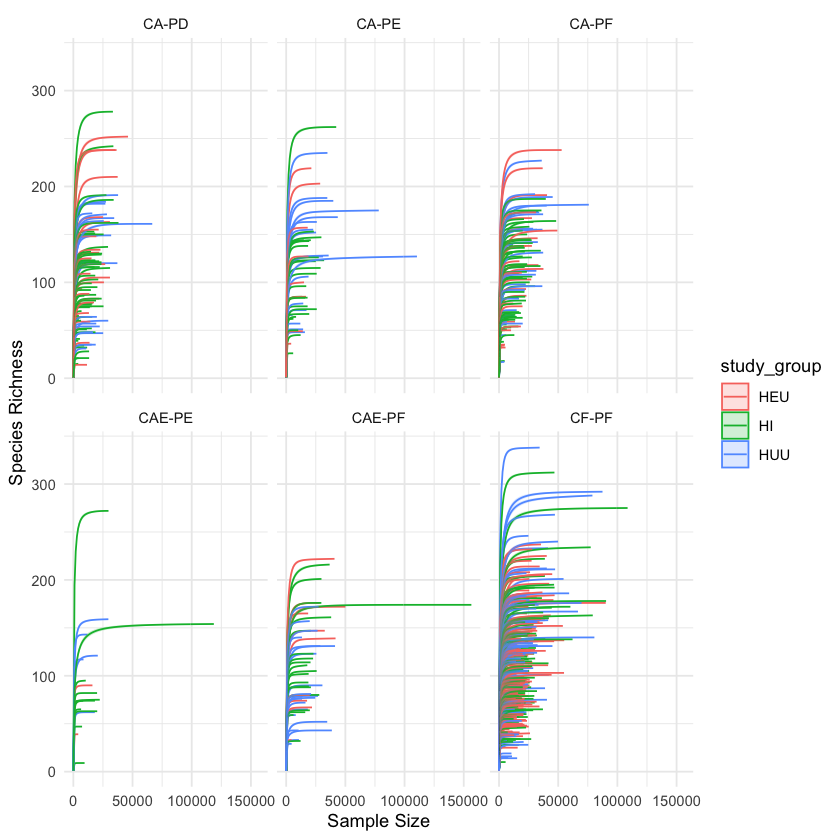

In [5]:
p <- p + facet_wrap(~aliquot_type)
p + theme_minimal()
pdf("rarefaction_plots.pdf")
p + theme_minimal()
dev.off()

#### Alpha diversity plots

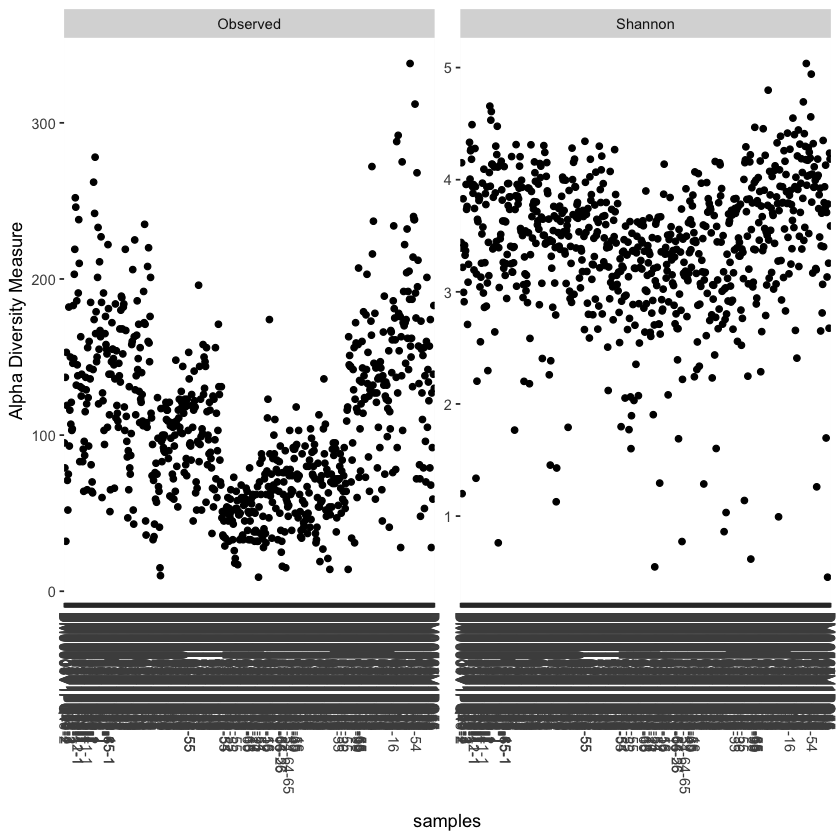

In [6]:
plot_richness(ps.dat, measures=c("Observed", "Shannon"))

pdf 
  2

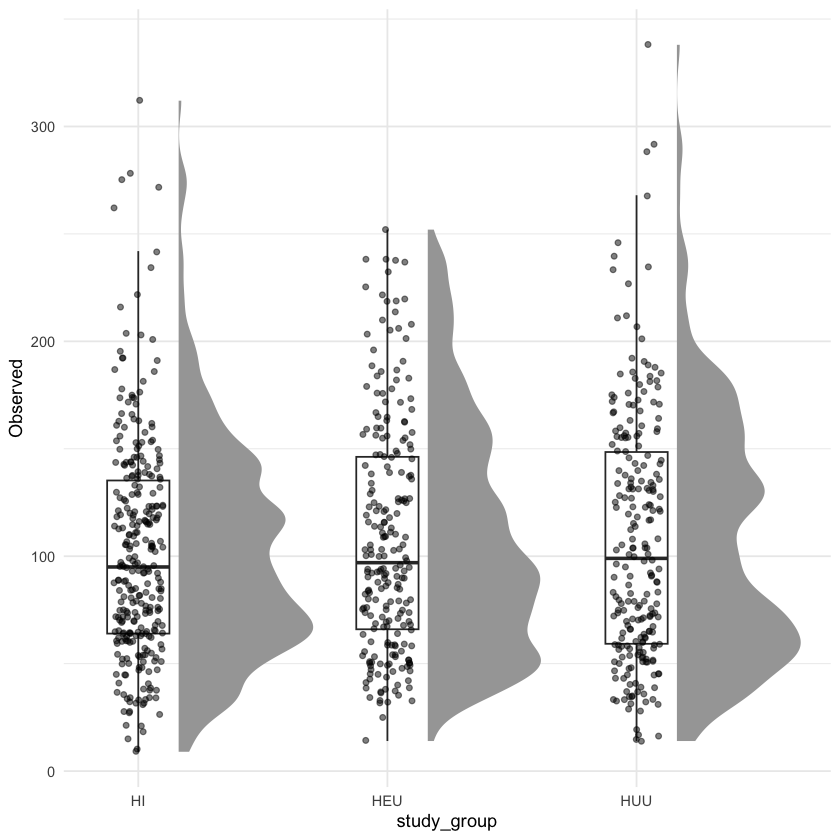

pdf 
  2

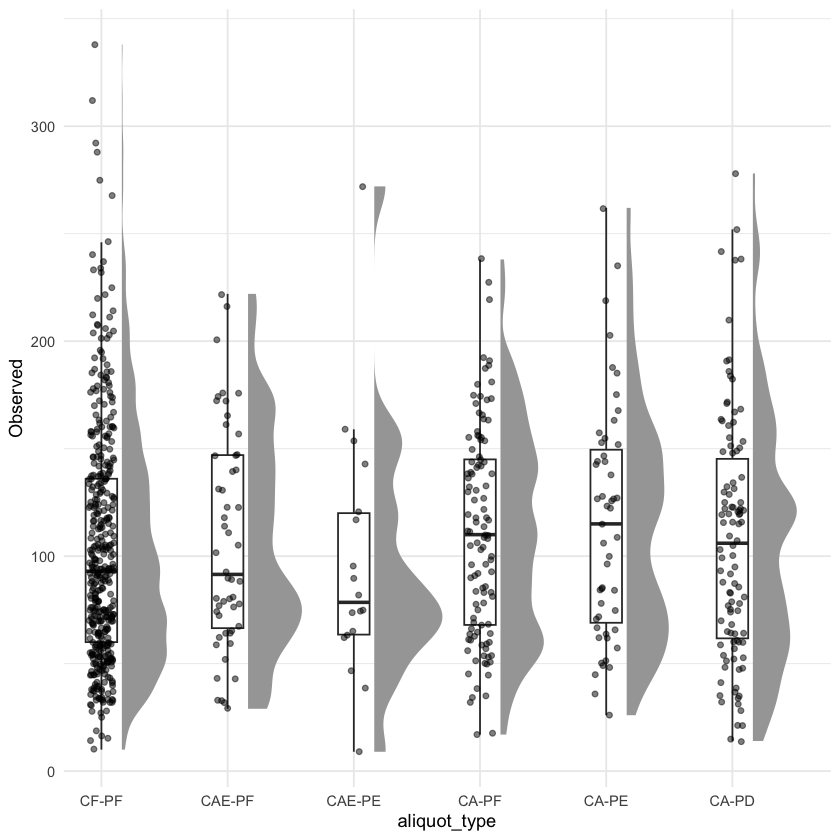

In [7]:
# rain cloud plots of alpha diversity (observed ASVs) by tooth health and HIV status
# install.packages("ggdist")
library(ggdist)
temp <- estimate_richness(subset_samples(ps.dat, study_group == "HI"))
temp$study_group <- "HI"
temp2 <- estimate_richness(subset_samples(ps.dat, study_group == "HEU"))
temp2$study_group <- "HEU"
temp3 <- estimate_richness(subset_samples(ps.dat, study_group == "HUU"))
temp3$study_group <- "HUU"

adiv_rain_study_group <- rbind(temp, temp2, temp3)
adiv_rain_study_group$study_group <- factor(adiv_rain_study_group$study_group, levels=c("HI", "HEU", "HUU"))

# raincloud plot HI group
p <- ggplot(adiv_rain_study_group, aes(x = study_group, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_study_group.pdf")
p
dev.off()

# raincloud plots aliquot type
temp <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CF-PF"))
temp$aliquot_type <- "CF-PF"
temp2 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CAE-PF"))
temp2$aliquot_type <- "CAE-PF"
temp3 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CAE-PE"))
temp3$aliquot_type <- "CAE-PE"
temp4 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PF"))
temp4$aliquot_type <- "CA-PF"
temp5 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PE"))
temp5$aliquot_type <- "CA-PE"
temp6 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PD"))
temp6$aliquot_type <- "CA-PD"

adiv_rain_aliquot_type <- rbind(temp, temp2, temp3, temp4, temp5, temp6)
adiv_rain_aliquot_type$aliquot_type <- factor(adiv_rain_aliquot_type$aliquot_type, levels=c("CF-PF", "CAE-PF", "CAE-PE", "CA-PF", "CA-PE", "CA-PD"))

# raincloud plot HI group
p <- ggplot(adiv_rain_aliquot_type, aes(x = aliquot_type, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_aliquot_type.pdf")
p
dev.off()

In [8]:
# head(adiv_rain_aliquot_type)
pairwise.wilcox.test(adiv_rain_aliquot_type$Observed, adiv_rain_aliquot_type$aliquot_type, p.adjust.method = "fdr")
pairwise.wilcox.test(adiv_rain_study_group$Observed, adiv_rain_study_group$study_group, p.adjust.method = "fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_aliquot_type$Observed and adiv_rain_aliquot_type$aliquot_type 

       CF-PF CAE-PF CAE-PE CA-PF CA-PE
CAE-PF 0.68  -      -      -     -    
CAE-PE 0.68  0.68   -      -     -    
CA-PF  0.67  0.68   0.67   -     -    
CA-PE  0.67  0.68   0.67   0.87  -    
CA-PD  0.68  0.94   0.68   0.68  0.68 

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_study_group$Observed and adiv_rain_study_group$study_group 

    HI   HEU 
HEU 0.73 -   
HUU 0.73 0.73

P value adjustment method: fdr 

In [9]:
# head(adiv_rain_aliquot_type)
pairwise.wilcox.test(adiv_rain_aliquot_type$Shannon, adiv_rain_aliquot_type$aliquot_type, p.adjust.method = "fdr")
pairwise.wilcox.test(adiv_rain_study_group$Shannon, adiv_rain_study_group$study_group, p.adjust.method = "fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_aliquot_type$Shannon and adiv_rain_aliquot_type$aliquot_type 

       CF-PF CAE-PF CAE-PE CA-PF CA-PE
CAE-PF 0.98  -      -      -     -    
CAE-PE 0.98  0.98   -      -     -    
CA-PF  0.45  0.75   0.81   -     -    
CA-PE  0.45  0.52   0.75   0.84  -    
CA-PD  0.52  0.75   0.79   0.45  0.45 

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_study_group$Shannon and adiv_rain_study_group$study_group 

    HI   HEU 
HEU 0.81 -   
HUU 0.81 0.81

P value adjustment method: fdr 

pdf 
  2

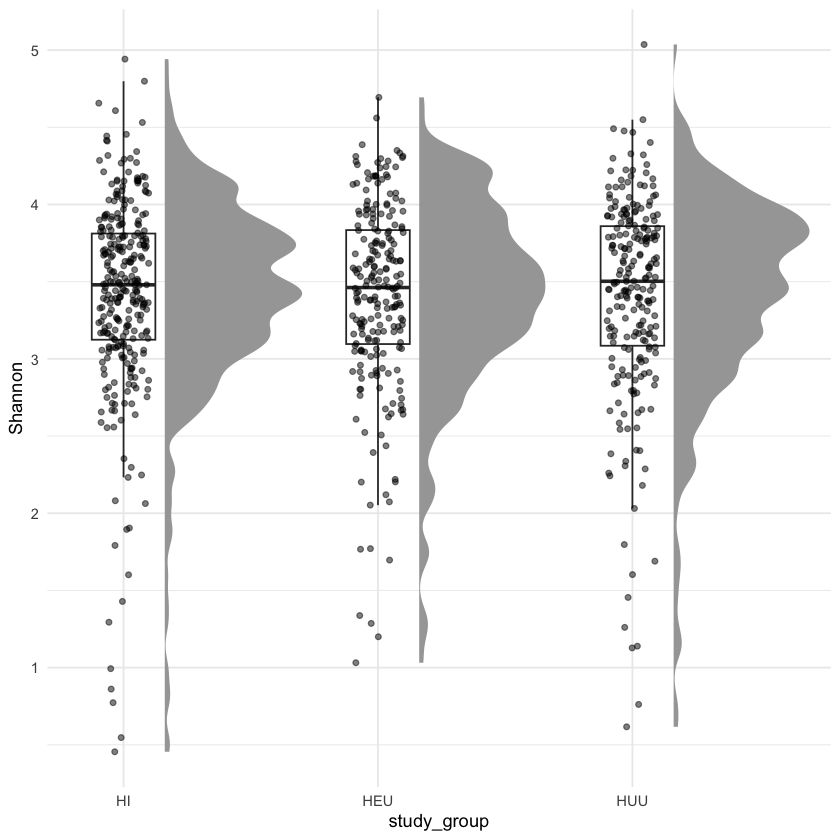

pdf 
  2

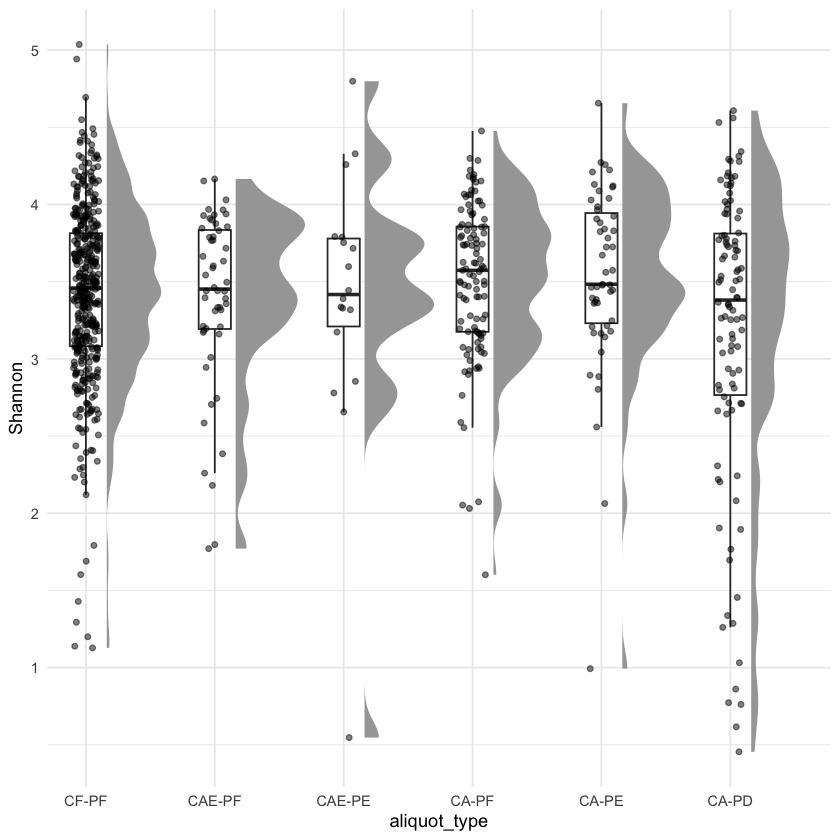

In [10]:
# rain cloud plots of alpha diversity (Shannon) by tooth health and HIV status
# install.packages("ggdist")
library(ggdist)
temp <- estimate_richness(subset_samples(ps.dat, study_group == "HI"))
temp$study_group <- "HI"
temp2 <- estimate_richness(subset_samples(ps.dat, study_group == "HEU"))
temp2$study_group <- "HEU"
temp3 <- estimate_richness(subset_samples(ps.dat, study_group == "HUU"))
temp3$study_group <- "HUU"

adiv_rain_study_group <- rbind(temp, temp2, temp3)
adiv_rain_study_group$study_group <- factor(adiv_rain_study_group$study_group, levels=c("HI", "HEU", "HUU"))

# raincloud plot HI group
p <- ggplot(adiv_rain_study_group, aes(x = study_group, y = Shannon)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_study_group.shannon.pdf")
p
dev.off()

# raincloud plots aliquot type
temp <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CF-PF"))
temp$aliquot_type <- "CF-PF"
temp2 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CAE-PF"))
temp2$aliquot_type <- "CAE-PF"
temp3 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CAE-PE"))
temp3$aliquot_type <- "CAE-PE"
temp4 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PF"))
temp4$aliquot_type <- "CA-PF"
temp5 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PE"))
temp5$aliquot_type <- "CA-PE"
temp6 <- estimate_richness(subset_samples(ps.dat, aliquot_type == "CA-PD"))
temp6$aliquot_type <- "CA-PD"

adiv_rain_aliquot_type <- rbind(temp, temp2, temp3, temp4, temp5, temp6)
adiv_rain_aliquot_type$aliquot_type <- factor(adiv_rain_aliquot_type$aliquot_type, levels=c("CF-PF", "CAE-PF", "CAE-PE", "CA-PF", "CA-PE", "CA-PD"))

# raincloud plot HI group
p <- ggplot(adiv_rain_aliquot_type, aes(x = aliquot_type, y = Shannon)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_aliquot_type.shannon.pdf")
p
dev.off()

pdf 
  2

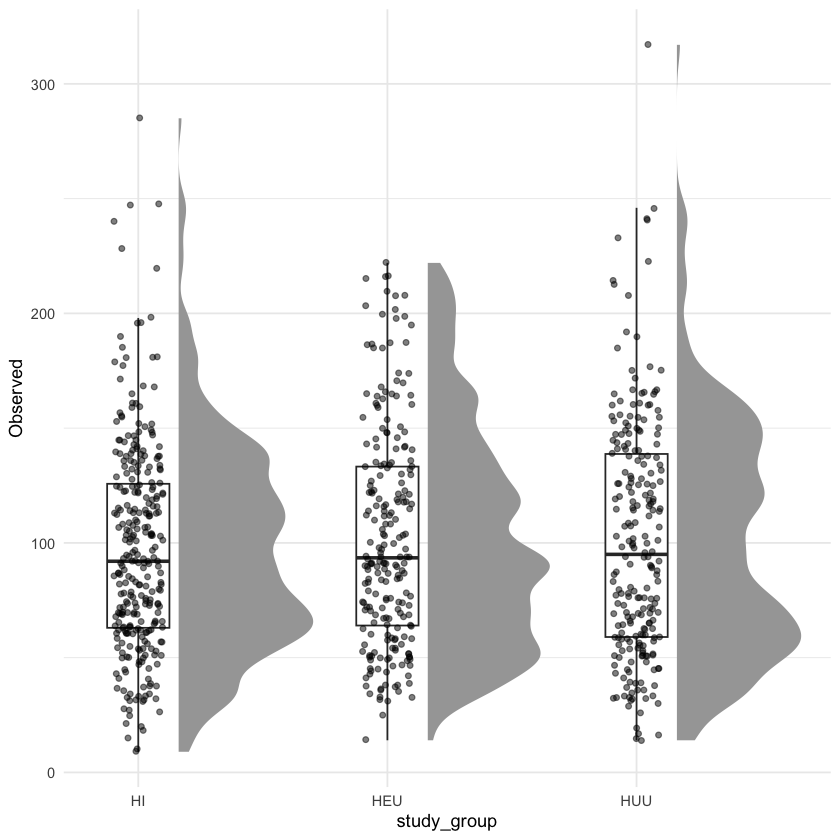

pdf 
  2

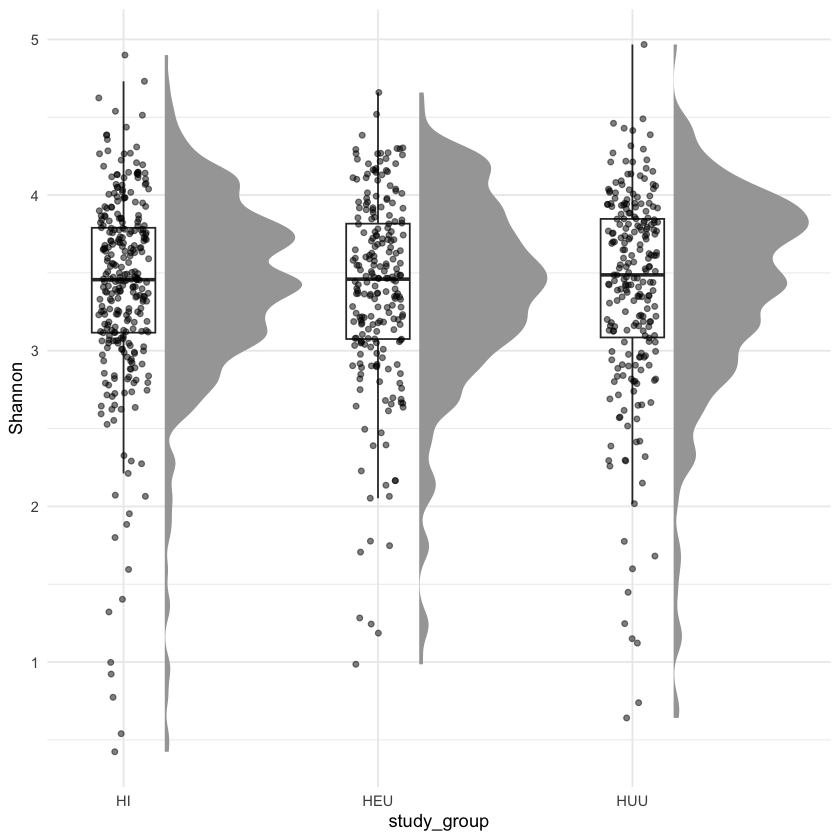

pdf 
  2

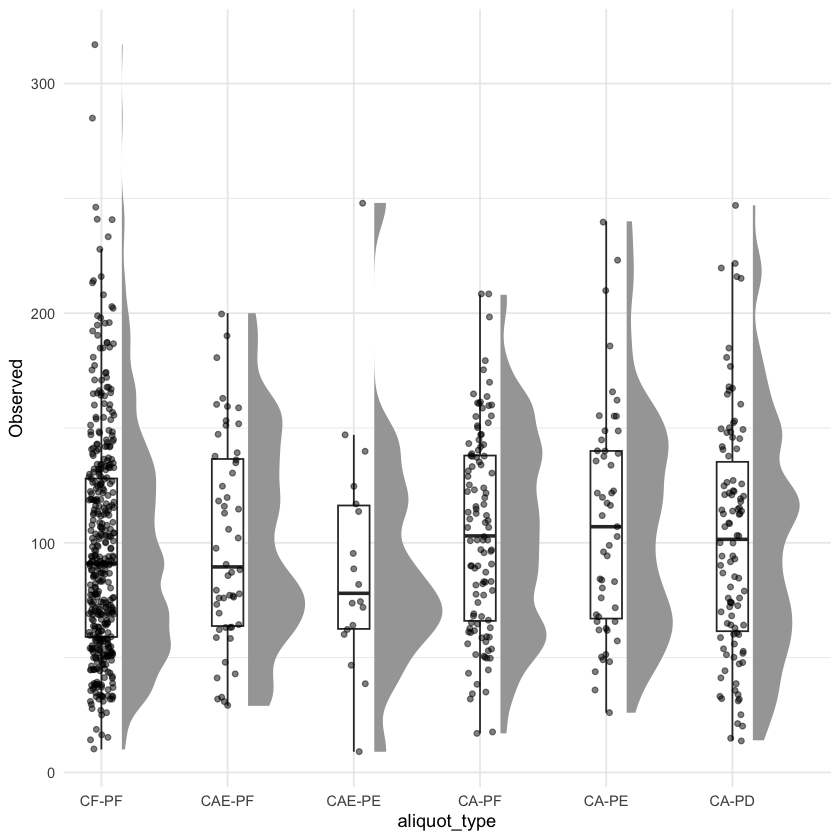

pdf 
  2


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_aliquot_type$Observed and adiv_rain_aliquot_type$aliquot_type 

       CF-PF CAE-PF CAE-PE CA-PF CA-PE
CAE-PF 0.66  -      -      -     -    
CAE-PE 0.72  0.66   -      -     -    
CA-PF  0.65  0.67   0.65   -     -    
CA-PE  0.65  0.66   0.65   0.84  -    
CA-PD  0.66  0.95   0.66   0.66  0.66 

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_study_group$Observed and adiv_rain_study_group$study_group 

    HI   HEU 
HEU 0.71 -   
HUU 0.71 0.71

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_aliquot_type$Shannon and adiv_rain_aliquot_type$aliquot_type 

       CF-PF CAE-PF CAE-PE CA-PF CA-PE
CAE-PF 0.97  -      -      -     -    
CAE-PE 0.97  0.97   -      -     -    
CA-PF  0.46  0.67   0.79   -     -    
CA-PE  0.46  0.46   0.72   0.79  -    
CA-PD  0.46  0.72   0.76   0.40  0.40 

P value adjustment method: fdr 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  adiv_rain_study_group$Shannon and adiv_rain_study_group$study_group 

    HI  HEU
HEU 0.8 -  
HUU 0.8 0.8

P value adjustment method: fdr 

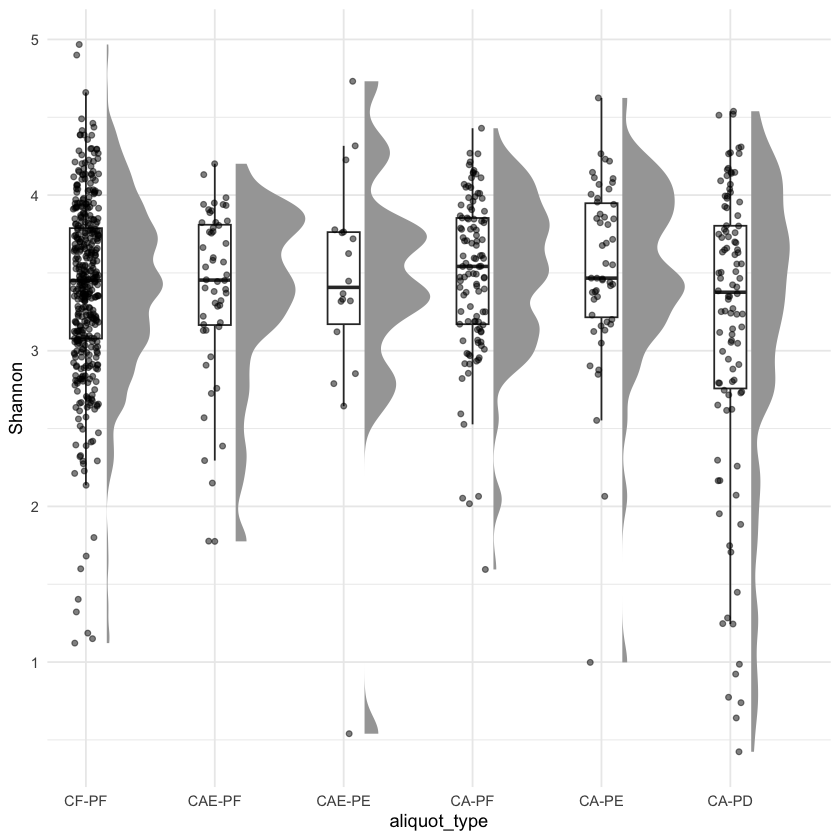

In [11]:
# try with rarified data
ps.dat.rare <- rarefy_even_depth(ps.dat, sample.size=min(sample_sums(ps.dat)), rngseed=TRUE, replace=TRUE, verbose=FALSE)
# remake table for study group with rareified data
temp <- estimate_richness(subset_samples(ps.dat.rare, study_group == "HI"))
temp$study_group <- "HI"
temp2 <- estimate_richness(subset_samples(ps.dat.rare, study_group == "HEU"))
temp2$study_group <- "HEU"
temp3 <- estimate_richness(subset_samples(ps.dat.rare, study_group == "HUU"))
temp3$study_group <- "HUU"

adiv_rain_study_group <- rbind(temp, temp2, temp3)
adiv_rain_study_group$study_group <- factor(adiv_rain_study_group$study_group, levels=c("HI", "HEU", "HUU"))

# raincloud plot HI group
p <- ggplot(adiv_rain_study_group, aes(x = study_group, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_study_group.RARE.pdf")
p
dev.off()
# Shannon
p <- ggplot(adiv_rain_study_group, aes(x = study_group, y = Shannon)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_study_group.shannon.RARE.pdf")
p
dev.off()

# remake for aliquot type
temp <- estimate_richness(subset_samples(ps.dat.rare, aliquot_type == "CF-PF"))
temp$aliquot_type <- "CF-PF"
temp2 <- estimate_richness(subset_samples(ps.dat.rare, aliquot_type == "CAE-PF"))
temp2$aliquot_type <- "CAE-PF"
temp3 <- estimate_richness(subset_samples(ps.dat.rare, aliquot_type == "CAE-PE"))
temp3$aliquot_type <- "CAE-PE"
temp4 <- estimate_richness(subset_samples(ps.dat.rare, aliquot_type == "CA-PF"))
temp4$aliquot_type <- "CA-PF"
temp5 <- estimate_richness(subset_samples(ps.dat.rare, aliquot_type == "CA-PE"))
temp5$aliquot_type <- "CA-PE"
temp6 <- estimate_richness(subset_samples(ps.dat.rare, aliquot_type == "CA-PD"))
temp6$aliquot_type <- "CA-PD"

adiv_rain_aliquot_type <- rbind(temp, temp2, temp3, temp4, temp5, temp6)
adiv_rain_aliquot_type$aliquot_type <- factor(adiv_rain_aliquot_type$aliquot_type, levels=c("CF-PF", "CAE-PF", "CAE-PE", "CA-PF", "CA-PE", "CA-PD"))

# raincloud plot HI group
p <- ggplot(adiv_rain_aliquot_type, aes(x = aliquot_type, y = Observed)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_aliquot_type.RARE.pdf")
p
dev.off()
# shannon
p <- ggplot(adiv_rain_aliquot_type, aes(x = aliquot_type, y = Shannon)) + 
  ggdist::stat_halfeye(
    adjust = .5, 
    width = .6, 
    .width = 0, 
    justification = -.3, 
    point_colour = NA) + 
  geom_boxplot(
    width = .25, 
    outlier.shape = NA
  ) +
  geom_point(
    size = 1.3,
    alpha = .5,
    position = position_jitter(
      seed = 1, width = .1
    )
  ) + 
    theme_minimal() +
  coord_cartesian(xlim = c(1.3, NA))
p
pdf("adiv_rain_aliquot_type.shannon.RARE.pdf")
p
dev.off()

pairwise.wilcox.test(adiv_rain_aliquot_type$Observed, adiv_rain_aliquot_type$aliquot_type, p.adjust.method = "fdr")
pairwise.wilcox.test(adiv_rain_study_group$Observed, adiv_rain_study_group$study_group, p.adjust.method = "fdr")
# shannon
pairwise.wilcox.test(adiv_rain_aliquot_type$Shannon, adiv_rain_aliquot_type$aliquot_type, p.adjust.method = "fdr")
pairwise.wilcox.test(adiv_rain_study_group$Shannon, adiv_rain_study_group$study_group, p.adjust.method = "fdr")

In [12]:
# beta dispersal plots to supplement capscale results
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(ps.dat)$study_group,2,8402.62,0.005966532,2.235874,0.001
Residual,745,1399889.61,0.994033468,NA,NA
Total,747,1408292.23,1.000000000,NA,NA


pdf 
  2

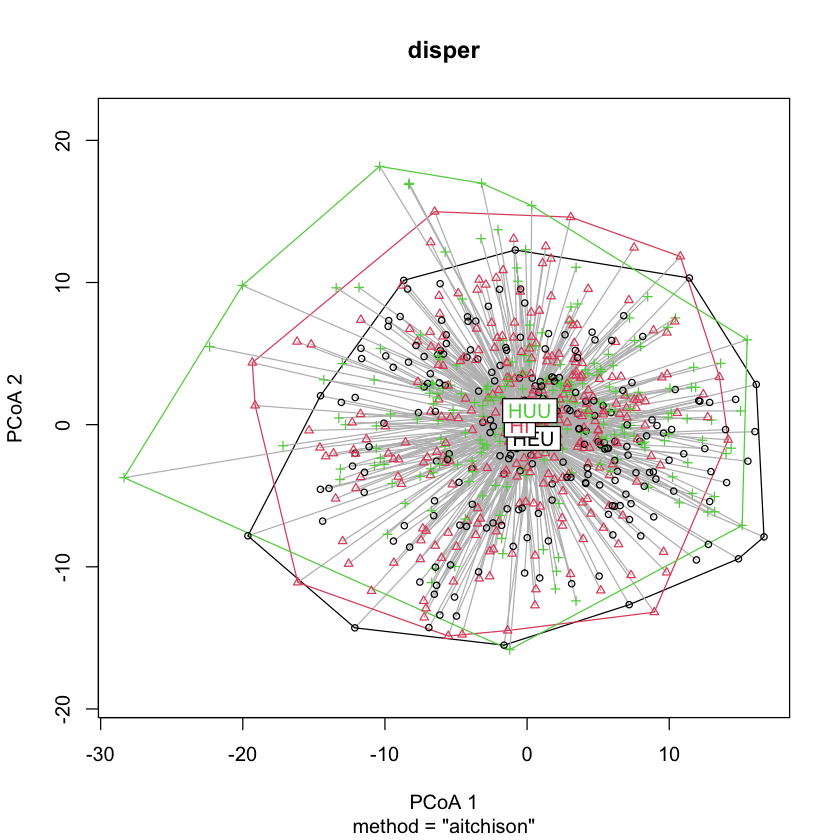

In [13]:
dist <- vegdist(otu_table(ps.dat), method="aitchison", pseudocount=1) 
disper <- betadisper(dist, group=sample_data(ps.dat)$study_group, type="centroid")
adonis2(dist ~ sample_data(ps.dat)$study_group)
plot(disper)
pdf("clr_bdiv_plot.study_group.pdf")
plot(disper)
dev.off()

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sample_data(ps.dat)$aliquot_type,5,14249.58,0.01011834,1.51691,0.001
Residual,742,1394042.65,0.98988166,NA,NA
Total,747,1408292.23,1.00000000,NA,NA


pdf 
  2

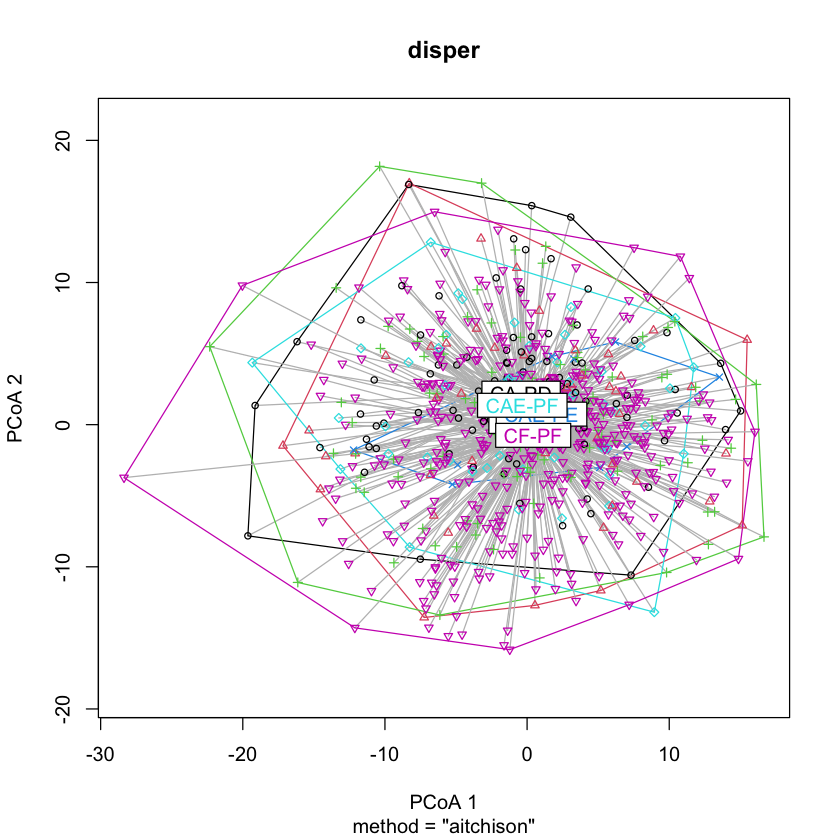

In [14]:
disper <- betadisper(dist, group=sample_data(ps.dat)$aliquot_type)
adonis2(dist ~ sample_data(ps.dat)$aliquot_type)
plot(disper) 
pdf("clr_bdiv_plot.aliquot_type.pdf")
plot(disper)
dev.off()

In [15]:
# I'm not digging the visualization of these, it's difficult to see centroids and perc variation of axes is extremely low
# instead use wunifrac, calculate centroids, and plot 
ord.hiv <- ordinate(ps.dat, "PCoA", "wunifrac")

In [16]:
# get centroids
axes <- as.data.frame(ord.hiv$vectors[,1:2])
colnames(axes) <- c("axis1", "axis2")
temp <- merge(axes, sample_data(ps.dat), by=0)
temp1 <- aggregate(temp$axis1 ~ temp$study_group, temp, mean)
temp2 <- aggregate(temp$axis2 ~ temp$study_group, temp, mean)
centroids <- merge(temp1, temp2, by="temp$study_group")
colnames(centroids) <- c("group", "axis1", "axis2")
centroids

group,axis1,axis2
<chr>,<dbl>,<dbl>
HEU,0.012668626,0.007528766
HI,-0.010824868,-0.004924076
HUU,0.001498865,-0.001038109


pdf 
  2

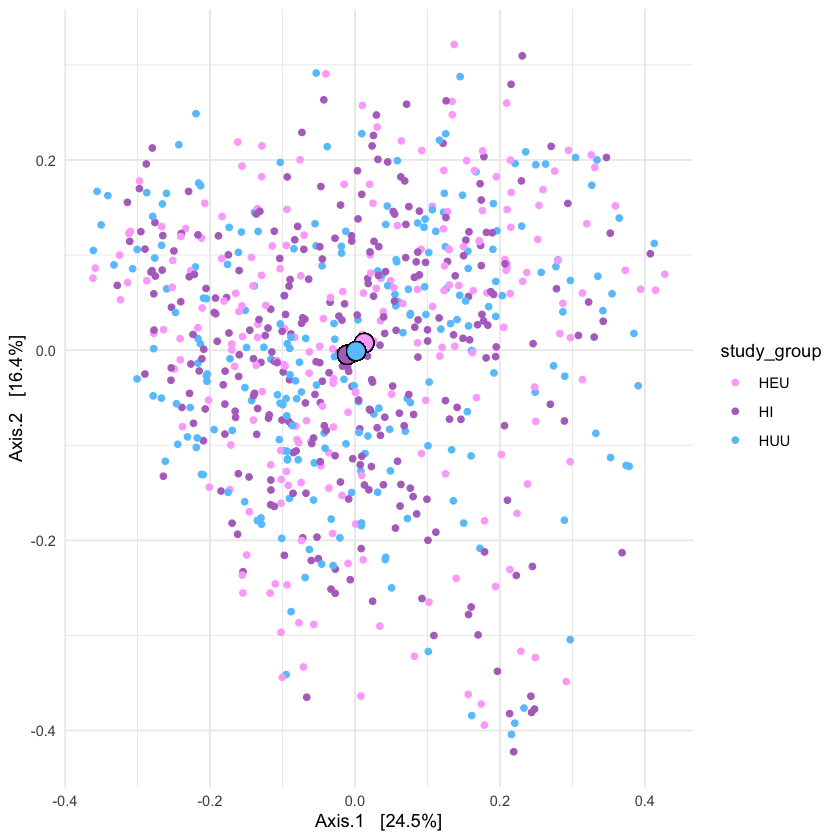

In [17]:
plot_ordination(ps.dat, ord.hiv, color="study_group") +
    theme_minimal() +
    scale_color_manual(values=c("#FCAEFC", "#B472C6", "#66C6FC")) +
    geom_point(aes(x=centroids$axis1[1], y=centroids$axis2[1], fill="HEU"), fill="#FCAEFC", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[2], y=centroids$axis2[2], fill="HI"), fill="#B472C6", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[3], y=centroids$axis2[3], fill="HUU"), fill="#66C6FC", color="black", size=5, pch=21)
pdf("unifrac_centroid_plot.study_group.pdf")
plot_ordination(ps.dat, ord.hiv, color="study_group") +
    theme_minimal() +
    scale_color_manual(values=c("#FCAEFC", "#B472C6", "#66C6FC")) +
    geom_point(aes(x=centroids$axis1[1], y=centroids$axis2[1], fill="HEU"), fill="#FCAEFC", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[2], y=centroids$axis2[2], fill="HI"), fill="#B472C6", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[3], y=centroids$axis2[3], fill="HUU"), fill="#66C6FC", color="black", size=5, pch=21)
dev.off()

In [18]:
# get centroids for oral health
temp1 <- aggregate(temp$axis1 ~ temp$aliquot_type, temp, mean)
temp2 <- aggregate(temp$axis2 ~ temp$aliquot_type, temp, mean)
centroids <- merge(temp1, temp2, by="temp$aliquot_type")
colnames(centroids) <- c("group", "axis1", "axis2")
centroids

group,axis1,axis2
<chr>,<dbl>,<dbl>
CA-PD,0.0194552593,-0.0957538394
CA-PE,-0.0012568410,-0.0014247720
CA-PF,0.0008538481,0.0109810887
CAE-PE,0.0142239227,-0.0358037256
CAE-PF,-0.0273431768,0.0003208185
CF-PF,-0.0020374818,0.0222846174


pdf 
  2

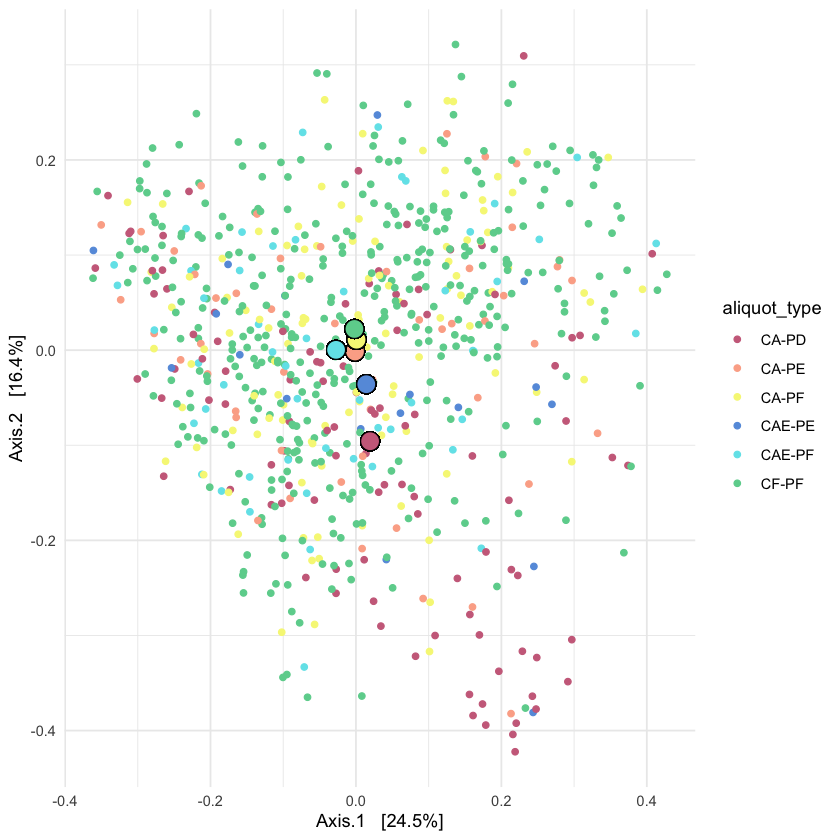

In [19]:
plot_ordination(ps.dat, ord.hiv, color="aliquot_type") +
    theme_minimal() +
    scale_color_manual(values=c("#CC6D8A", "#FCAE96", "#F6F684", "#679CDE", "#71E4EA", "#6CD29C")) +
    geom_point(aes(x=centroids$axis1[1], y=centroids$axis2[1], fill="CA-PD"), fill="#CC6D8A", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[2], y=centroids$axis2[2], fill="CA-PE"), fill="#FCAE96", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[3], y=centroids$axis2[3], fill="CA-PF"), fill="#F6F684", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[4], y=centroids$axis2[4], fill="CAE-PE"), fill="#679CDE", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[5], y=centroids$axis2[5], fill="CAE-PF"), fill="#71E4EA", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[6], y=centroids$axis2[6], fill="CF-PF"), fill="#6CD29C", color="black", size=5, pch=21)
pdf("unifrac_centroid_plot.aliquot_type.pdf")
plot_ordination(ps.dat, ord.hiv, color="aliquot_type") +
    theme_minimal() +
    scale_color_manual(values=c("#CC6D8A", "#FCAE96", "#F6F684", "#679CDE", "#71E4EA", "#6CD29C")) +
    geom_point(aes(x=centroids$axis1[1], y=centroids$axis2[1], fill="CA-PD"), fill="#CC6D8A", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[2], y=centroids$axis2[2], fill="CA-PE"), fill="#FCAE96", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[3], y=centroids$axis2[3], fill="CA-PF"), fill="#F6F684", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[4], y=centroids$axis2[4], fill="CAE-PE"), fill="#679CDE", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[5], y=centroids$axis2[5], fill="CAE-PF"), fill="#71E4EA", color="black", size=5, pch=21) +
    geom_point(aes(x=centroids$axis1[6], y=centroids$axis2[6], fill="CF-PF"), fill="#6CD29C", color="black", size=5, pch=21)
dev.off()

In [20]:
# significance codes
dist.temp <- distance(ps.dat, method="wunifrac")

In [21]:
metadata <- as(sample_data(ps.dat), "data.frame")

In [22]:
adonis2(dist.temp ~ study_group, data=metadata)
adonis2(dist.temp ~ aliquot_type, data=metadata)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
study_group,2,0.550391,0.00617373,2.314,0.003
Residual,745,88.600089,0.99382627,NA,NA
Total,747,89.150480,1.00000000,NA,NA


,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aliquot_type,5,2.893797,0.03245969,4.978622,0.001
Residual,742,86.256683,0.96754031,NA,NA
Total,747,89.150480,1.00000000,NA,NA


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2918 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 2918 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2918 tips and 2917 internal nodes ]

Warning message:
“Removed 408 rows containing non-finite values (`stat_boxplot()`).”


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV1,CF-PF,CAE-PF,0.01254800,0.16,0.013,*,Wilcoxon
ASV1,CF-PF,CA-PF,0.35290711,0.57,0.353,ns,Wilcoxon
ASV1,CF-PF,CAE-PE,0.90573905,0.91,0.906,ns,Wilcoxon
ASV1,CF-PF,CA-PE,0.18663943,0.53,0.187,ns,Wilcoxon
ASV1,CF-PF,CA-PD,0.02141362,0.16,0.021,*,Wilcoxon
ASV1,CAE-PF,CA-PF,0.11602379,0.52,0.116,ns,Wilcoxon
ASV1,CAE-PF,CAE-PE,0.13778982,0.52,0.138,ns,Wilcoxon
ASV1,CAE-PF,CA-PE,0.21685111,0.53,0.217,ns,Wilcoxon
ASV1,CAE-PF,CA-PD,0.27361701,0.53,0.274,ns,Wilcoxon


Warning message:
“Removed 733 rows containing non-finite values (`stat_boxplot()`).”


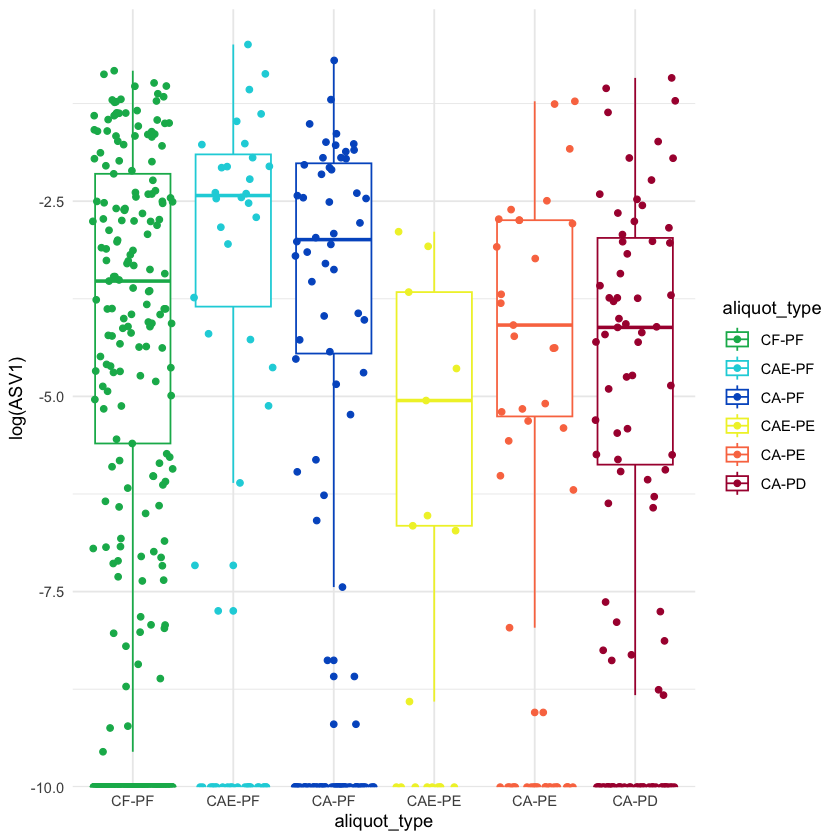

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV1575,CF-PF,CAE-PF,0.0007454311,0.0089,0.00075,***,Wilcoxon
ASV1575,CF-PF,CA-PF,0.4730766206,0.5300,0.47308,ns,Wilcoxon
ASV1575,CF-PF,CAE-PE,0.5824699293,0.5800,0.58247,ns,Wilcoxon
ASV1575,CF-PF,CA-PE,0.3524995338,0.4700,0.35250,ns,Wilcoxon
ASV1575,CF-PF,CA-PD,0.1882151681,0.3200,0.18822,ns,Wilcoxon
ASV1575,CAE-PF,CA-PF,0.0688629845,0.2100,0.06886,ns,Wilcoxon
ASV1575,CAE-PF,CAE-PE,0.1804974992,0.3200,0.18050,ns,Wilcoxon
ASV1575,CAE-PF,CA-PE,0.0244836743,0.0980,0.02448,*,Wilcoxon
ASV1575,CAE-PF,CA-PD,0.0015417547,0.0093,0.00154,**,Wilcoxon


Warning message:
“Removed 720 rows containing non-finite values (`stat_boxplot()`).”


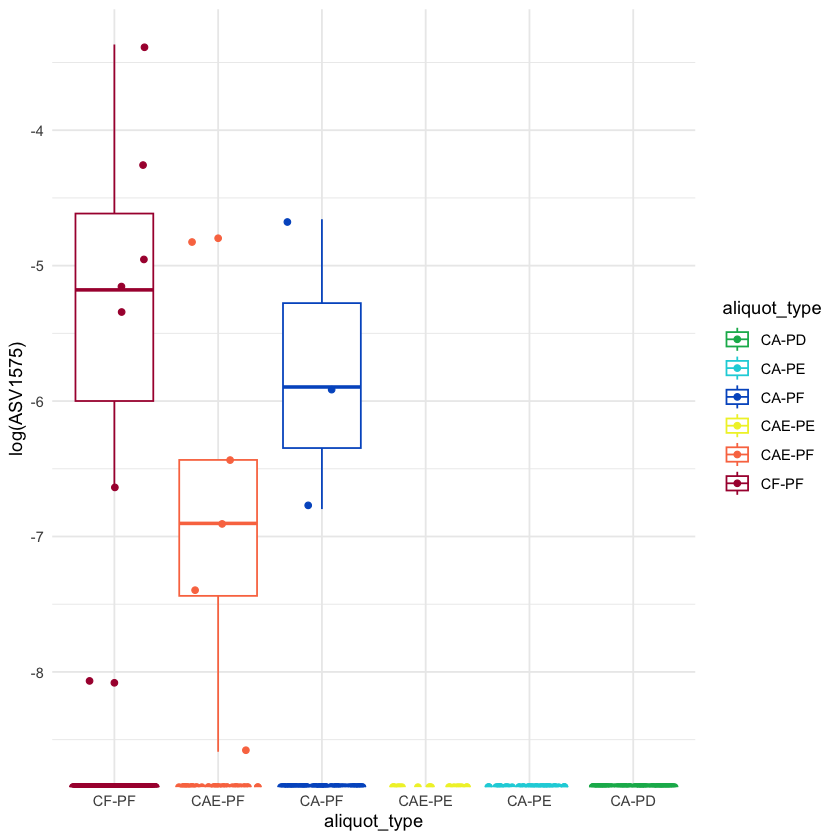

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV1578,CF-PF,CAE-PF,0.52637611,0.88,0.526,ns,Wilcoxon
ASV1578,CF-PF,CA-PF,0.03499434,0.26,0.035,*,Wilcoxon
ASV1578,CF-PF,CAE-PE,0.39953507,0.88,0.400,ns,Wilcoxon
ASV1578,CF-PF,CA-PE,0.03469341,0.26,0.035,*,Wilcoxon
ASV1578,CF-PF,CA-PD,0.41303459,0.88,0.413,ns,Wilcoxon
ASV1578,CAE-PF,CA-PF,0.52799210,0.88,0.528,ns,Wilcoxon
ASV1578,CAE-PF,CAE-PE,0.77397337,0.93,0.774,ns,Wilcoxon
ASV1578,CAE-PF,CA-PE,0.42120712,0.88,0.421,ns,Wilcoxon
ASV1578,CAE-PF,CA-PD,0.99545364,1.00,0.995,ns,Wilcoxon


Warning message:
“Removed 727 rows containing non-finite values (`stat_boxplot()`).”


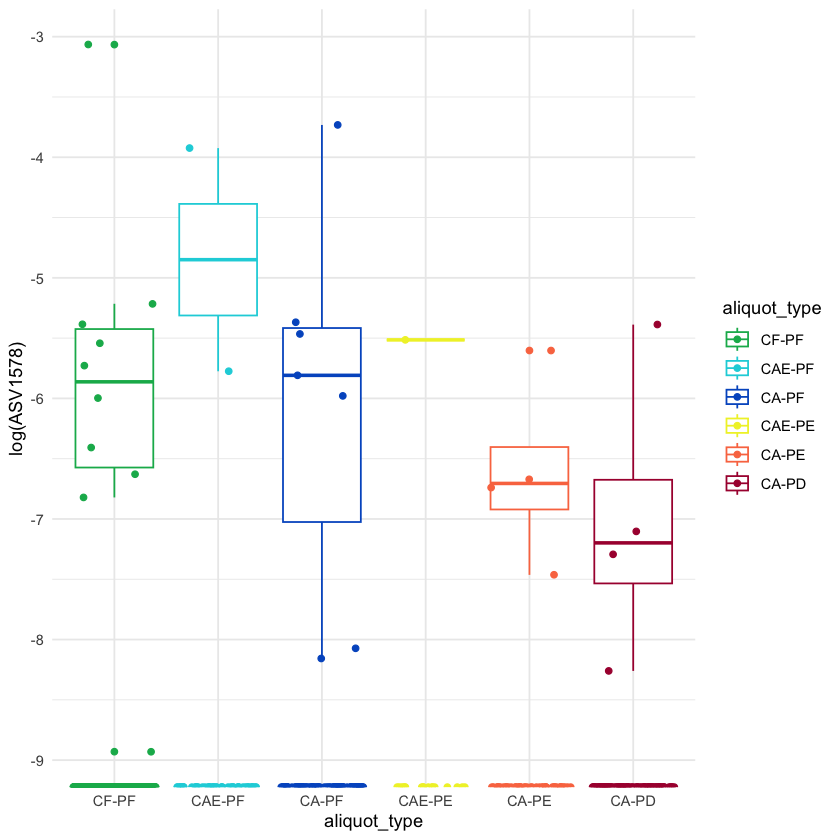

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV2219,CF-PF,CAE-PF,0.0002832073,0.0024,0.00028,***,Wilcoxon
ASV2219,CF-PF,CA-PF,0.1221433996,0.2600,0.12214,ns,Wilcoxon
ASV2219,CF-PF,CAE-PE,0.3333058495,0.5000,0.33331,ns,Wilcoxon
ASV2219,CF-PF,CA-PE,0.9318688999,0.9300,0.93187,ns,Wilcoxon
ASV2219,CF-PF,CA-PD,0.3114901721,0.5000,0.31149,ns,Wilcoxon
ASV2219,CAE-PF,CA-PF,0.0003221663,0.0024,0.00032,***,Wilcoxon
ASV2219,CAE-PF,CAE-PE,0.4939744855,0.6100,0.49397,ns,Wilcoxon
ASV2219,CAE-PF,CA-PE,0.0558139662,0.1700,0.05581,ns,Wilcoxon
ASV2219,CAE-PF,CA-PD,0.0700915530,0.1800,0.07009,ns,Wilcoxon


Warning message:
“Removed 408 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 733 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 720 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 727 rows containing non-finite values (`stat_boxplot()`).”


pdf 
  2

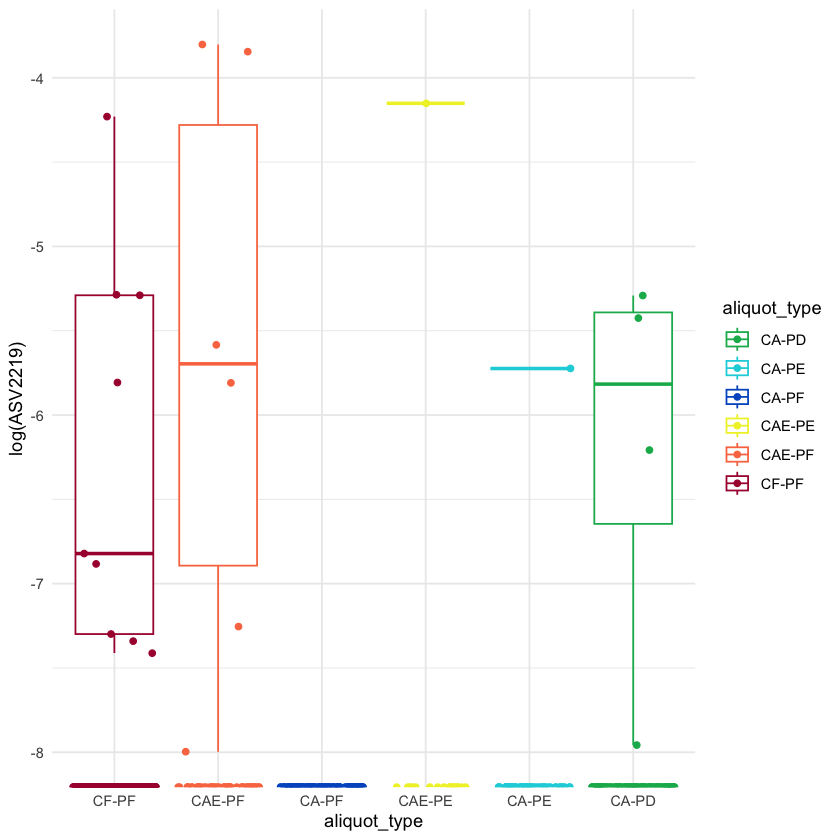

In [30]:
# relative abundance of same ASVs (log transformed)
relabund <- transform_sample_counts(ps.dat, function(x) x / sum(x))
relabund
# number of ASVs in a single tooth within a single species
temp <- as.data.frame(otu_table(relabund))
temp$aliquot_type <- sample_data(relabund)$aliquot_type
temp$aliquot_type <- factor(temp$aliquot_type, levels=c("CF-PF", "CAE-PF", "CA-PF", "CAE-PE", "CA-PE", "CA-PD"))
# plot individual boxplots -- only including those that are significant in final figure
ggplot(temp, aes(x=aliquot_type, y=log(ASV1), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV1 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

ggplot(temp, aes(x=aliquot_type, y=log(ASV1575), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV1575 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

ggplot(temp, aes(x=aliquot_type, y=log(ASV1578), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV1578 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

ggplot(temp, aes(x=aliquot_type, y=log(ASV2219), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
compare_means(ASV2219 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

pdf("asv_abundance_suppFig2C.pdf")
ggplot(temp, aes(x=aliquot_type, y=log(ASV1), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
ggplot(temp, aes(x=aliquot_type, y=log(ASV1575), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
ggplot(temp, aes(x=aliquot_type, y=log(ASV1578), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
ggplot(temp, aes(x=aliquot_type, y=log(ASV2219), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
dev.off()

# # install.packages("ggpubr")
# library(ggpubr)
# pdf("asv_abundance_suppFig2C.pdf")
# ggarrange(asv1, asv1141, asv1488, asv1575, asv1578, asv1908, asv2010, asv2219, asv2756, asv3105, asv343, asv5879, asv842, ncol=7, nrow=3)
# dev.off()
# # not sure why colors get flipped in subsequent figures... will fix in inkscape, put on todolist
# ggarrange(asv1, asv1141, asv1488, asv1575, asv1578, asv1908, asv2010, asv2219, asv2756, asv3105, asv343, asv5879, asv842, ncol=7, nrow=3)


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV12,CF-PF,CAE-PF,2.857411e-01,3.6e-01,0.2857,ns,Wilcoxon
ASV12,CF-PF,CA-PF,1.617664e-01,2.4e-01,0.1618,ns,Wilcoxon
ASV12,CF-PF,CAE-PE,1.545199e-02,4.4e-02,0.0155,*,Wilcoxon
ASV12,CF-PF,CA-PE,1.766734e-02,4.4e-02,0.0177,*,Wilcoxon
ASV12,CF-PF,CA-PD,1.477604e-10,2.2e-09,1.5e-10,****,Wilcoxon
ASV12,CAE-PF,CA-PF,1.192665e-01,2.0e-01,0.1193,ns,Wilcoxon
ASV12,CAE-PF,CAE-PE,1.649491e-02,4.4e-02,0.0165,*,Wilcoxon
ASV12,CAE-PF,CA-PE,4.139738e-02,8.9e-02,0.0414,*,Wilcoxon
ASV12,CAE-PF,CA-PD,1.367738e-03,8.9e-03,0.0014,**,Wilcoxon


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV2,CF-PF,CAE-PF,4.322306e-01,6.7e-01,0.4322,ns,Wilcoxon
ASV2,CF-PF,CA-PF,1.251511e-01,2.7e-01,0.1252,ns,Wilcoxon
ASV2,CF-PF,CAE-PE,8.609599e-01,8.6e-01,0.8610,ns,Wilcoxon
ASV2,CF-PF,CA-PE,6.456971e-02,2.2e-01,0.0646,ns,Wilcoxon
ASV2,CF-PF,CA-PD,8.003326e-08,1.2e-06,8e-08,****,Wilcoxon
ASV2,CAE-PF,CA-PF,7.915302e-01,8.5e-01,0.7915,ns,Wilcoxon
ASV2,CAE-PF,CAE-PE,5.990110e-01,6.9e-01,0.5990,ns,Wilcoxon
ASV2,CAE-PF,CA-PE,4.811553e-01,6.7e-01,0.4812,ns,Wilcoxon
ASV2,CAE-PF,CA-PD,2.213131e-02,1.1e-01,0.0221,*,Wilcoxon


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV6,CF-PF,CAE-PF,4.553209e-01,6.8e-01,0.45532,ns,Wilcoxon
ASV6,CF-PF,CA-PF,9.064674e-01,9.9e-01,0.90647,ns,Wilcoxon
ASV6,CF-PF,CAE-PE,9.349819e-01,9.9e-01,0.93498,ns,Wilcoxon
ASV6,CF-PF,CA-PE,5.916842e-04,3.0e-03,0.00059,***,Wilcoxon
ASV6,CF-PF,CA-PD,8.258579e-12,1.2e-10,8.3e-12,****,Wilcoxon
ASV6,CAE-PF,CA-PF,6.011035e-01,8.2e-01,0.60110,ns,Wilcoxon
ASV6,CAE-PF,CAE-PE,8.214254e-01,9.9e-01,0.82143,ns,Wilcoxon
ASV6,CAE-PF,CA-PE,1.159567e-01,2.5e-01,0.11596,ns,Wilcoxon
ASV6,CAE-PF,CA-PD,3.738942e-03,1.4e-02,0.00374,**,Wilcoxon


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV63,CF-PF,CAE-PF,0.02113331,0.16,0.021,*,Wilcoxon
ASV63,CF-PF,CA-PF,0.39738571,0.66,0.397,ns,Wilcoxon
ASV63,CF-PF,CAE-PE,0.34073909,0.66,0.341,ns,Wilcoxon
ASV63,CF-PF,CA-PE,0.43882284,0.66,0.439,ns,Wilcoxon
ASV63,CF-PF,CA-PD,0.12041357,0.43,0.120,ns,Wilcoxon
ASV63,CAE-PF,CA-PF,0.02057260,0.16,0.021,*,Wilcoxon
ASV63,CAE-PF,CAE-PE,0.75200489,0.82,0.752,ns,Wilcoxon
ASV63,CAE-PF,CA-PE,0.40268987,0.66,0.403,ns,Wilcoxon
ASV63,CAE-PF,CA-PD,0.50163659,0.68,0.502,ns,Wilcoxon


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASV7,CF-PF,CAE-PF,7.718451e-01,7.7e-01,0.77185,ns,Wilcoxon
ASV7,CF-PF,CA-PF,5.859304e-02,9.8e-02,0.05859,ns,Wilcoxon
ASV7,CF-PF,CAE-PE,7.416356e-04,2.6e-03,0.00074,***,Wilcoxon
ASV7,CF-PF,CA-PE,8.562837e-04,2.6e-03,0.00086,***,Wilcoxon
ASV7,CF-PF,CA-PD,7.677315e-18,1.2e-16,< 2e-16,****,Wilcoxon
ASV7,CAE-PF,CA-PF,2.357500e-01,2.9e-01,0.23575,ns,Wilcoxon
ASV7,CAE-PF,CAE-PE,2.117908e-02,5.3e-02,0.02118,*,Wilcoxon
ASV7,CAE-PF,CA-PE,4.764530e-02,8.9e-02,0.04765,*,Wilcoxon
ASV7,CAE-PF,CA-PD,1.653309e-04,8.3e-04,0.00017,***,Wilcoxon


Warning message:
“Removed 710 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 671 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 679 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 726 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 692 rows containing non-finite values (`stat_boxplot()`).”


pdf 
  2

Warning message:
“Removed 710 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 671 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 679 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 726 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 692 rows containing non-finite values (`stat_boxplot()`).”


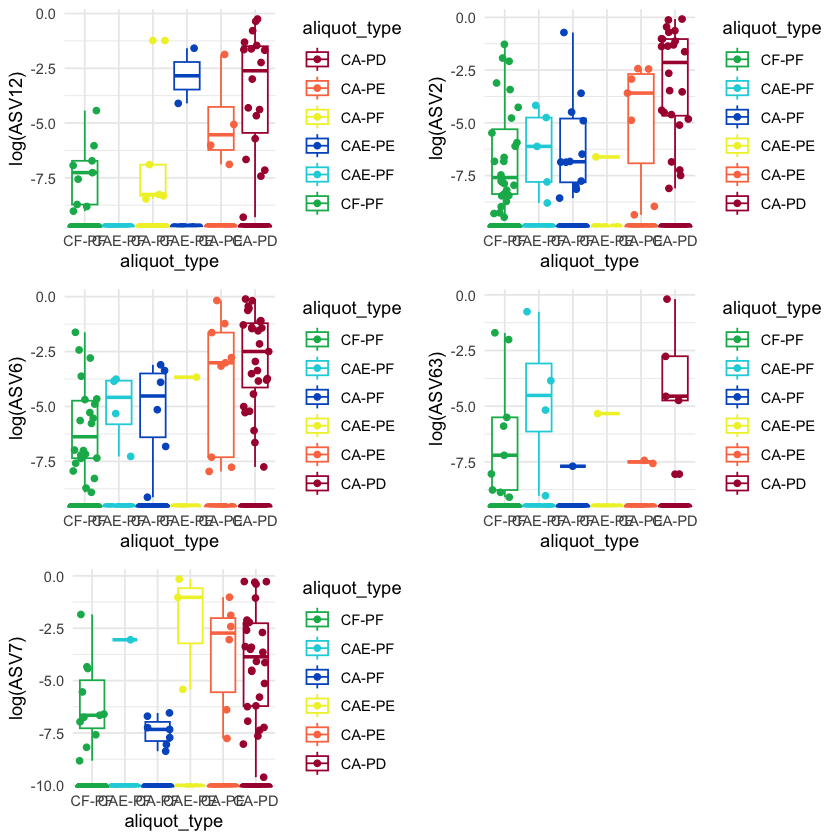

In [31]:
# do this for the strep mutans supplementary figure as well
# relative abundance of Strep mutans ASVs for supplement
# number of ASVs in a single tooth within a single species
temp <- as.data.frame(otu_table(relabund))
temp$aliquot_type <- sample_data(relabund)$aliquot_type
temp$aliquot_type <- factor(temp$aliquot_type, levels=c("CF-PF", "CAE-PF", "CA-PF", "CAE-PE", "CA-PE", "CA-PD"))
# plot individual boxplots
asv12 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV12), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#AA0A3C", "#FA7850", "#F0F032", "#005AC8", "#14D2DC", "#0AB45A"))
asv2 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV2), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
asv6 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV6), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
asv63 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV63), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))
asv7 <- ggplot(temp, aes(x=aliquot_type, y=log(ASV7), color=aliquot_type)) + geom_boxplot() + geom_jitter() + theme_minimal() + scale_color_manual(values=c("#0AB45A", "#14D2DC", "#005AC8", "#F0F032", "#FA7850", "#AA0A3C"))

compare_means(ASV12 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")
compare_means(ASV2 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")
compare_means(ASV6 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")
compare_means(ASV63 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")
compare_means(ASV7 ~ aliquot_type, temp, method="wilcox.test", p.adjust.method ="fdr")

pdf("asv_abundance_suppFigStrep.pdf")
ggarrange(asv12, asv2, asv6, asv63, asv7, ncol=2, nrow=3)
dev.off()
ggarrange(asv12, asv2, asv6, asv63, asv7, ncol=2, nrow=3)

In [ ]:
# finally, want to collapse ASV table at species level (names already manually cleaned by removing strain identifiers)
# use for average number of species per sample (tooth)
# species <- read.table("species_ASV_table.txt", header=T)

In [ ]:
# library(dplyr)
# collapse.species <- species %>%
#     group_by(Taxonomy) %>%
#     summarise(across(everything(), sum)) %>%
#     as.data.frame()
# # sanity check
# dim(species)
# dim(collapse.species)

In [ ]:
# write.table(collapse.species, file="collapse_ASV_table.species.txt", sep="\t", quote=FALSE, row.names=FALSE)